### Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/MonthlyWiseArrivals.csv')

In [3]:
#dropping rows which contain NaN
df = df.dropna(axis=0)
df.columns

Index([u'Market', u'Month Name', u'Year', u'Arrival (q)',
       u'Price Minimum (Rs/q)', u'Price Maximum (Rs/q)',
       u'Modal Price (Rs/q)'],
      dtype='object')

In [4]:
df[df['Month Name'] == 'January']
df.sort_values(by = ['Market','Year'],axis=0)
df.iloc[:,2:6] = df.iloc[:,2:6].astype(int)
df.head()

,Market,Month Name,Year,Arrival (q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,AGRA(UP),January,2016,134200,1039,1443,1349.0
1,AGRA(UP),February,2016,95600,938,1254,1156.0
2,AHMEDABAD(GUJ),January,2016,198390,646,1224,997.0
3,AHMEDABAD(GUJ),February,2016,163540,565,978,830.0
4,AHMEDNAGAR(MS),January,2016,208751,175,1722,1138.0


In [5]:
df['State'] = df['Market'].str.split("(").str[-1]

In [6]:
df['State'] = df['State'].str.split(")").str[0]

In [7]:
df['City'] = df['Market'].str.split("(").str[0]
df['City'] = df['City'].str.split(")").str[0]

In [8]:
df1= df.groupby(['State','Market'],as_index=True).count()

In [9]:
pd.to_datetime('January 2012')

Timestamp('2012-01-01 00:00:00')

In [10]:
df['Date'] = df['Month Name'] + "-" + df['Year'].map(str)

In [11]:
index = pd.to_datetime(df['Date'])

In [12]:
df.index = pd.PeriodIndex(df['Date'],freq='M')

In [13]:
df = pd.read_csv('./Data/MonthWiseMarketArrivals_Clean.csv')

In [14]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [15]:
df['date'] = pd.DatetimeIndex(df['date'])

In [16]:
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

### How big is Banglore market compared to others in 2010?

In [17]:
df2010 = df[df['year']==2010]

In [18]:
#groupby city and sum along a column
dfj = df2010.groupby(['city'], as_index=False).quantity.sum()

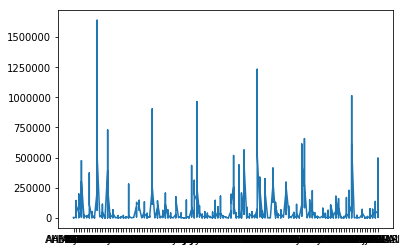

In [35]:
dfj.sort_values(by = 'quantity', ascending = False)
plt.plot(df['city'],df['quantity'])

###  Have the price variation in Onion prices in Bangalore really gone up over the years?¶

In [92]:
dfb = df[df['city']=='BANGALORE']
dfb

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01
721,BANGALORE,January,2009,374380,848,1554,1328,KNT,BANGALORE,2009-01-01
722,BANGALORE,January,2010,423649,502,1837,1267,KNT,BANGALORE,2010-01-01
723,BANGALORE,January,2011,375695,2029,3167,2731,KNT,BANGALORE,2011-01-01
724,BANGALORE,January,2012,531906,161,736,583,KNT,BANGALORE,2012-01-01
725,BANGALORE,January,2013,426367,857,1830,1551,KNT,BANGALORE,2013-01-01


In [106]:
dfb = dfb.sort_values(by = "date")
dfb.index = pd.PeriodIndex(dfb['date'], freq='M')

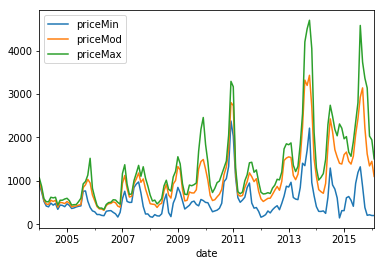

In [118]:
dfb.plot(kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

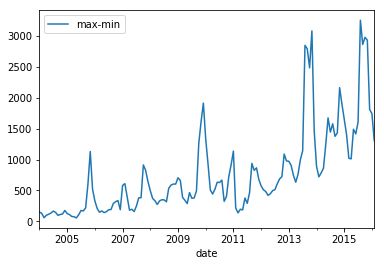

In [120]:
dfb['max-min'] = dfb['priceMax'] - dfb['priceMin']
dfb.plot(kind = "line", y = ['max-min'])